In [289]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
from scipy import stats
import seaborn as sns

In [8]:
data_folder = 'C:\\Users\\brand\\OneDrive\\Documents\\School\\MIS581\\Portfolio Data'
files = glob.glob(data_folder + "\*.csv")

In [56]:
li = []

for filename in files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
    
df = pd.concat(li, axis=0, ignore_index=True, sort=False)

df.drop(['strk','rsos'], axis=1, inplace = True)


In [57]:
years = ['15-16','16-17','17-18','18-19','19-20']

In [58]:
df_sorted = df.sort_values(['year','conf','division','winpct'], ascending=False)
df_sorted[df.year == years[2]][['year','team','conf','division','winpct','playoff']]

C:\Users\brand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,year,team,conf,division,winpct,playoff
70,17-18,Houston,West,Southwest,0.793,1
78,17-18,New Orleans,West,Southwest,0.585,1
86,17-18,San Antonio,West,Southwest,0.573,1
66,17-18,Dallas,West,Southwest,0.293,0
74,17-18,Memphis,West,Southwest,0.268,0
69,17-18,Golden State,West,Pacific,0.707,1
72,17-18,LA Clippers,West,Pacific,0.512,0
73,17-18,LA Lakers,West,Pacific,0.427,0
85,17-18,Sacramento,West,Pacific,0.329,0
83,17-18,Phoenix,West,Pacific,0.256,0


In [59]:
#select data for years that have had playoffs
completeSeasons = df[df.year != years[-1]]
print(completeSeasons)

      year         team  conf   division  gp  pts/gm  apts/gm  ptsdiff   pace  \
0    15-16      Atlanta  East  Southeast  82   102.6     99.1      3.5   97.0   
1    15-16       Boston  East   Atlantic  82   105.7    102.5      3.2   98.5   
2    15-16     Brooklyn  East   Atlantic  82    98.6    106.0     -7.4   95.2   
3    15-16    Charlotte  East  Southeast  82   103.4    100.7      2.7   95.7   
4    15-16      Chicago  East    Central  82   101.6    103.1     -1.5   95.7   
..     ...          ...   ...        ...  ..     ...      ...      ...    ...   
115  18-19   Sacramento  West    Pacific  82   114.2    115.3     -1.1  103.1   
116  18-19  San Antonio  West  Southwest  82   111.7    110.0      1.7   98.3   
117  18-19      Toronto  East   Atlantic  82   114.4    108.4      6.0  100.1   
118  18-19         Utah  West  Northwest  82   111.7    106.4      5.3  100.3   
119  18-19   Washington  East  Southeast  82   114.0    116.9     -2.9  101.4   

      oeff  ...   sar  cons

## Hypothesis 1
* HO = Playoff teams have no significant difference in strength of schedule than non-playoff teams 
* H1 = Playoff teams have an easier strength of schedule that non-playoff teams


In [279]:
completeSeasons[completeSeasons['playoff'] ==1]['sos'].mean()

-0.37453125

In [278]:
completeSeasons[completeSeasons['playoff'] ==0]['sos'].mean()

0.38696428571428576

In [281]:
playoffWinpct = completeSeasons[completeSeasons['playoff'] ==1]['sos']
nPlayoffWinpct = completeSeasons[completeSeasons['playoff'] ==0]['sos']
stats.ttest_ind(playoffWinpct, nPlayoffWinpct)

Ttest_indResult(statistic=-7.428889364298277, pvalue=1.8811275055887334e-11)

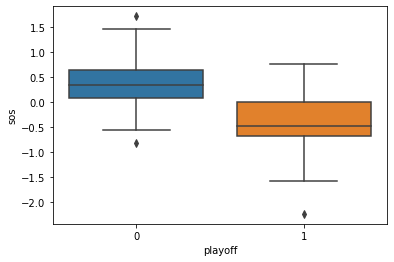

In [286]:
sns.boxplot( y=completeSeasons['sos'], x=completeSeasons['playoff'])
plt.show()

## Hypothesis 2
* HO = There is no correlation between Pace and A4F
* H1 = There is a positive correlation between Pace and A4F


In [63]:
pace = df['pace']
a4f = df['a4f']

In [64]:
stats.pearsonr(pace, a4f)

(0.14343565272815373, 0.07993017366078341)

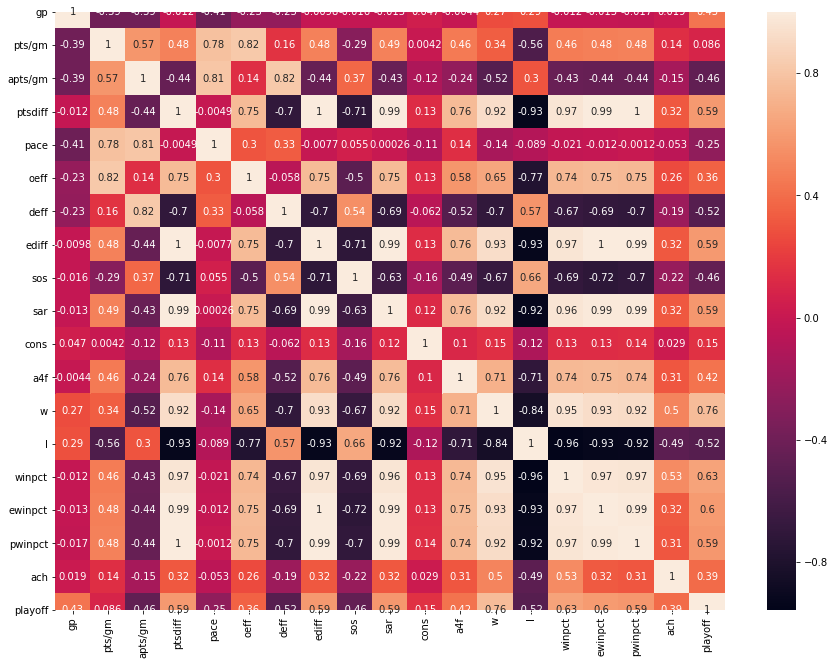

In [70]:
fig_dims = (15,11)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), annot = True)

## Prepare Data for Random Forest

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = completeSeasons[[ 'gp', 'pts/gm', 'apts/gm',
       'ptsdiff', 'pace', 'oeff', 'deff', 'ediff', 'sos', 'sar', 'cons', 'a4f',
        'winpct', 'ewinpct', 'pwinpct', 'ach']]
Y = completeSeasons['playoff']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

clf = RandomForestClassifier(n_estimators = 1000)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


## Hypothesis 3

In [306]:
feature_names = [ 'gp', 'pts/gm', 'apts/gm',
       'ptsdiff', 'pace', 'oeff', 'deff', 'ediff', 'sos', 'sar', 'cons', 'a4f',
        'winpct', 'ewinpct', 'pwinpct', 'ach']
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(feature_imp)

winpct     0.267997
ediff      0.145355
ptsdiff    0.113679
pwinpct    0.107599
ewinpct    0.106020
sar        0.083172
a4f        0.040704
ach        0.036159
oeff       0.023142
sos        0.019548
deff       0.015928
apts/gm    0.014392
pace       0.011791
pts/gm     0.009493
cons       0.005022
gp         0.000000
dtype: float64


## Random Forest / Predictions

In [318]:
X_red = completeSeasons[[ 'winpct','ptsdiff','ediff','ewinpct','pwinpct']]
Y = completeSeasons['playoff']

X_red_train, X_red_test, y_train, y_test = train_test_split(X_red,Y, test_size=0.3)

clf2 = RandomForestClassifier(n_estimators = 1000)

clf2.fit(X_red_train, y_train)

y_red_pred = clf2.predict(X_red_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_red_pred))

Accuracy: 0.9722222222222222


In [319]:
inc_season = df[df.year == years[-1]]
inc_season_data = inc_season[[ 'winpct','ptsdiff','ediff','ewinpct','pwinpct']]
inc_season_pred = clf2.predict(inc_season_data)
res = inc_season.assign(playoff = inc_season_pred)
res_sorted = res[['team','conf','division','winpct','playoff']].sort_values(['conf','division','winpct'], ascending=False)
print(res_sorted[res.playoff == 1])


              team  conf   division  winpct  playoff
130        Houston  West  Southwest   0.625        1
126         Dallas  West  Southwest   0.597        1
133      LA Lakers  West    Pacific   0.778        1
132    LA Clippers  West    Pacific   0.688        1
127         Denver  West  Northwest   0.662        1
148           Utah  West  Northwest   0.641        1
140  Oklahoma City  West  Northwest   0.625        1
135          Miami  East  Southeast   0.631        1
136      Milwaukee  East    Central   0.815        1
131        Indiana  East    Central   0.600        1
147        Toronto  East   Atlantic   0.719        1
121         Boston  East   Atlantic   0.672        1
142   Philadelphia  East   Atlantic   0.600        1


C:\Users\brand\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [320]:
remaining_teams = res[res.playoff == 0]
remaining_teams_sorted = remaining_teams[['team','conf','winpct']].sort_values(['conf','winpct'], ascending=False)
print(remaining_teams_sorted)

             team  conf  winpct
134       Memphis  West   0.492
144      Portland  West   0.439
138   New Orleans  West   0.438
145    Sacramento  West   0.438
146   San Antonio  West   0.429
143       Phoenix  West   0.400
137     Minnesota  West   0.297
129  Golden State  West   0.231
122      Brooklyn  East   0.469
141       Orlando  East   0.462
149    Washington  East   0.375
123     Charlotte  East   0.354
124       Chicago  East   0.338
139      New York  East   0.318
128       Detroit  East   0.303
120       Atlanta  East   0.299
125     Cleveland  East   0.292
